# Evaluation

In [43]:
# Imports 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

import joblib
import pandas as pd

In [3]:
# Load data
data_loader = DataLoader()
X_train, y_train  = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [34]:
# logistic regression
lr_model_filename = '../models/logistic_regression/lr_model_sampling_20241124_155301.pkl'
logistic_regression = joblib.load(lr_model_filename)

# naive bayes

# support vector machine
svm_model_filename = '../models/support_vector_machine/svm_model_halving-grid_full-dataset_accuracy_20241125_230119.pkl'
svm = joblib.load(svm_model_filename)


# decision tree

# knn ??

# baselines
bl_model_filename = '../models/baseline/bl_model_majority20241126_120730.pkl'
bl_majority = joblib.load(bl_model_filename)


# all models
model_dict = {
    'Logistic Regression': logistic_regression,
    'Support Vector Machine': svm,
    'Baseline Majority': bl_majority
    # Add other models here
}

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [49]:
# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)

    report = classification_report(y_test, y_test_pred, digits=4)
    print(f"\n=== Model: {model_name} ===\n")
    print("Classification Report:\n", report)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp) # this is basically just the recall of the negative class
    print(f"Specificity: {specificity:.4f}") 
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:\n", cm)


=== Model: Logistic Regression ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9434    0.7188    0.8159     42314
         1.0     0.3385    0.7693    0.4702      7915

    accuracy                         0.7268     50229
   macro avg     0.6410    0.7441    0.6431     50229
weighted avg     0.8481    0.7268    0.7615     50229

Accuracy: 0.7268
Specificity: 0.7188

Confusion Matrix:
 [[30417 11897]
 [ 1826  6089]]

=== Model: Support Vector Machine ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9542    0.4714    0.6310     42314
         1.0     0.2372    0.8790    0.3736      7915

    accuracy                         0.5356     50229
   macro avg     0.5957    0.6752    0.5023     50229
weighted avg     0.8412    0.5356    0.5905     50229

Accuracy: 0.5356
Specificity: 0.4714

Confusion Matrix:
 [[19947 22367]
 [  958  6957]]

=== Model: Baseline Majority ===

Classifica

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie50

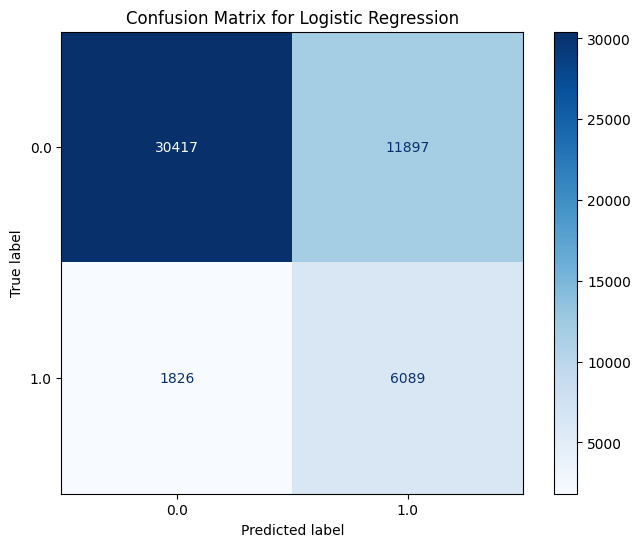

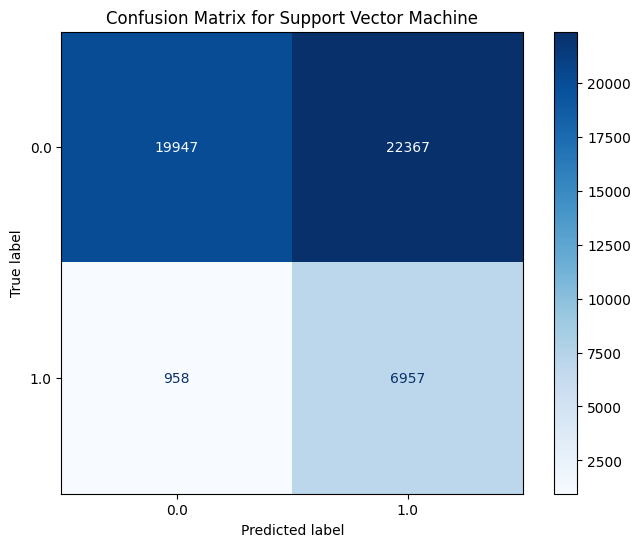

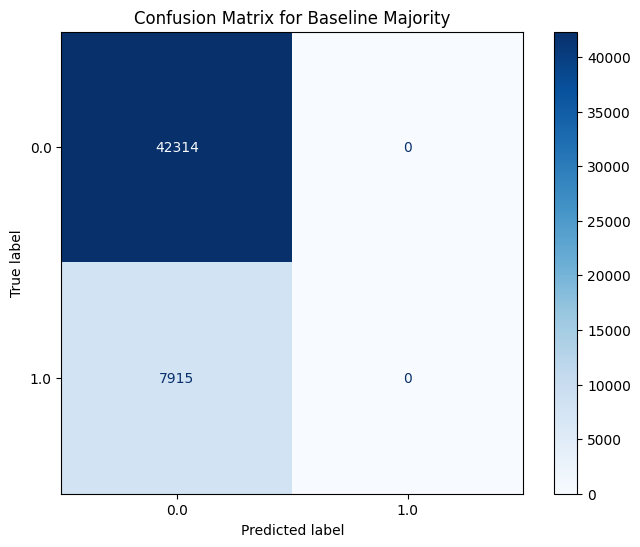

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

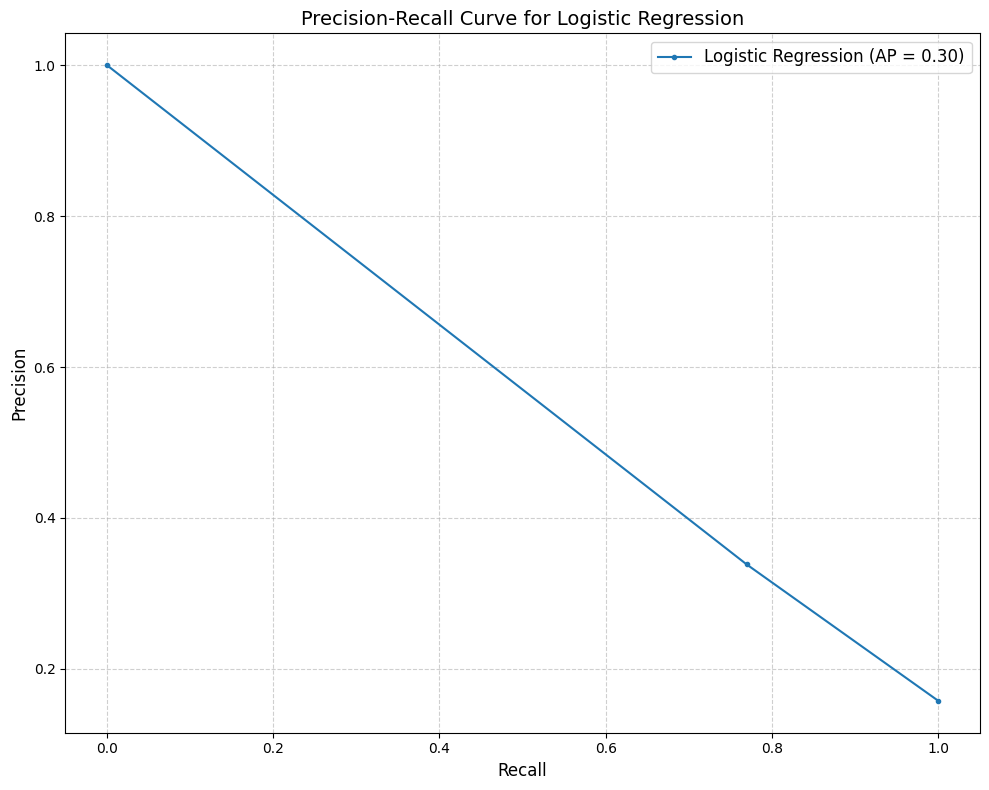

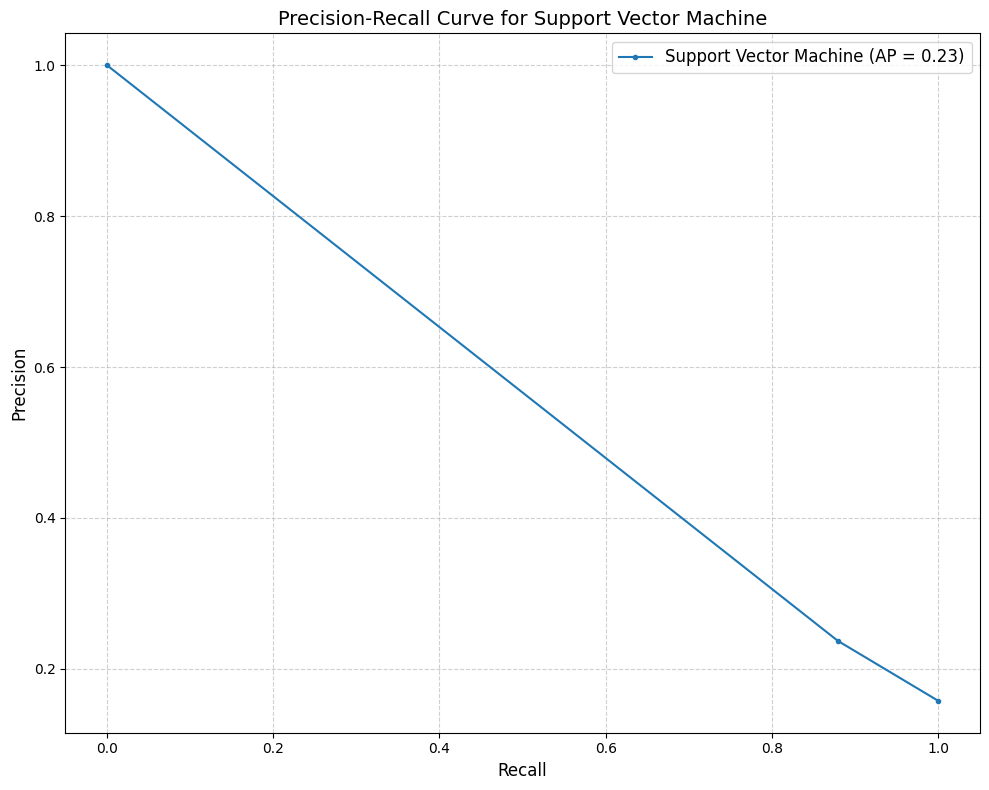

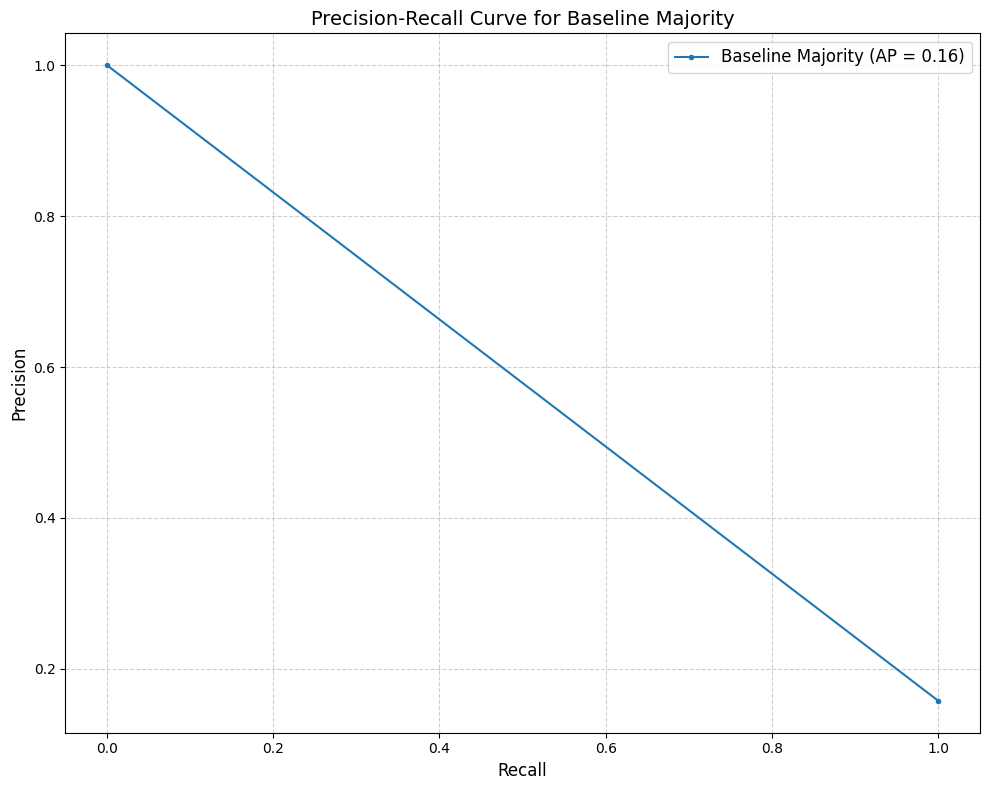

In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    average_precision = average_precision_score(y_test, y_test_pred)

    # Plot the precision-recall curve
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6, linestyle='--')
    plt.tight_layout()
    plt.show()

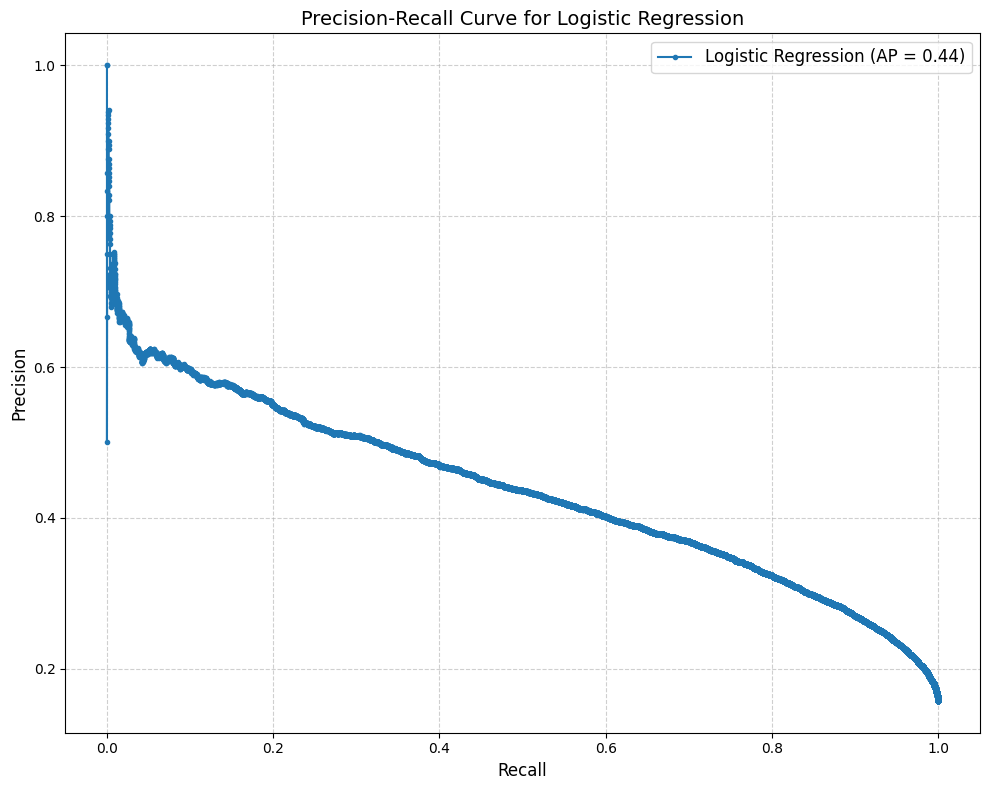

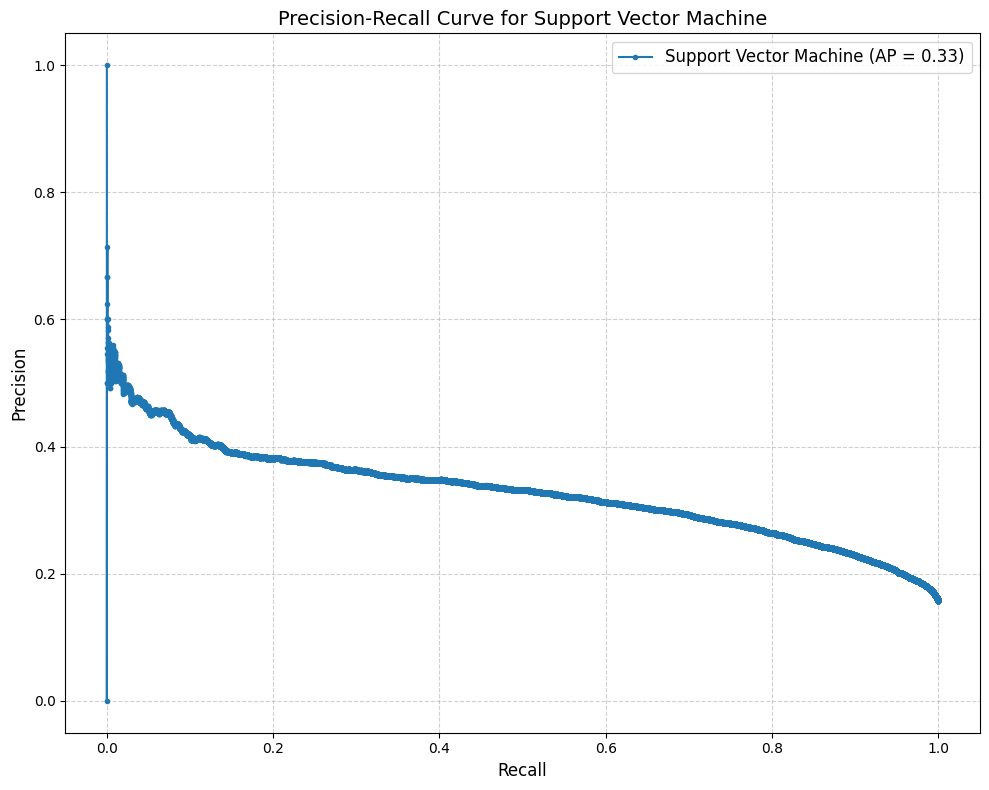

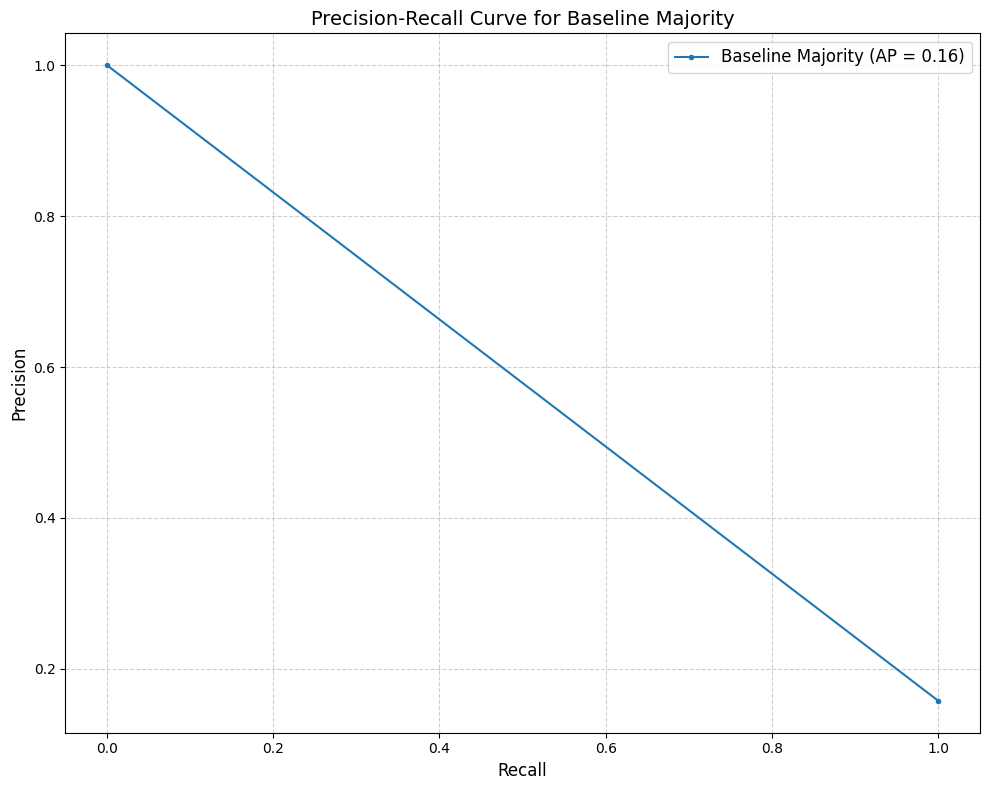

In [42]:
for model_name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        y_test_proba = model.decision_function(X_test)
        
    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    average_precision = average_precision_score(y_test, y_test_proba)

    # Plot the precision-recall curve
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6, linestyle='--')
    plt.tight_layout()
    plt.show()


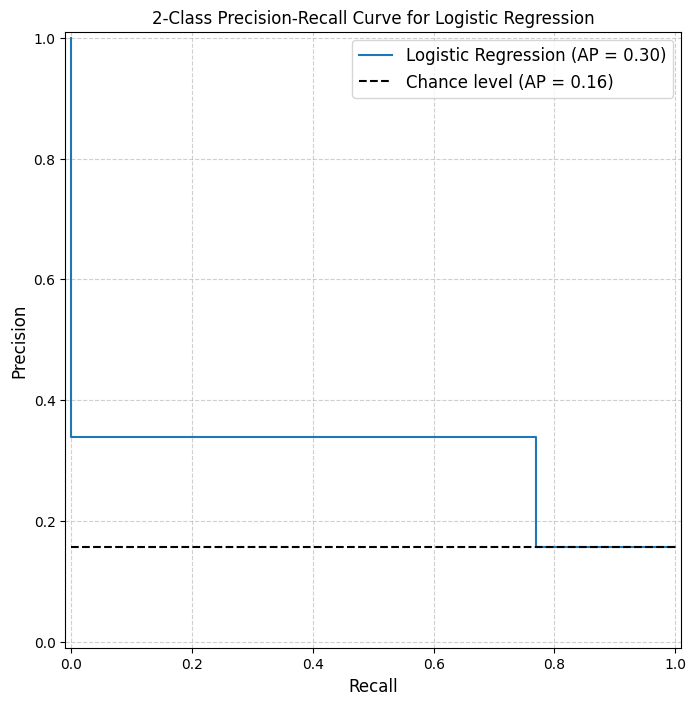

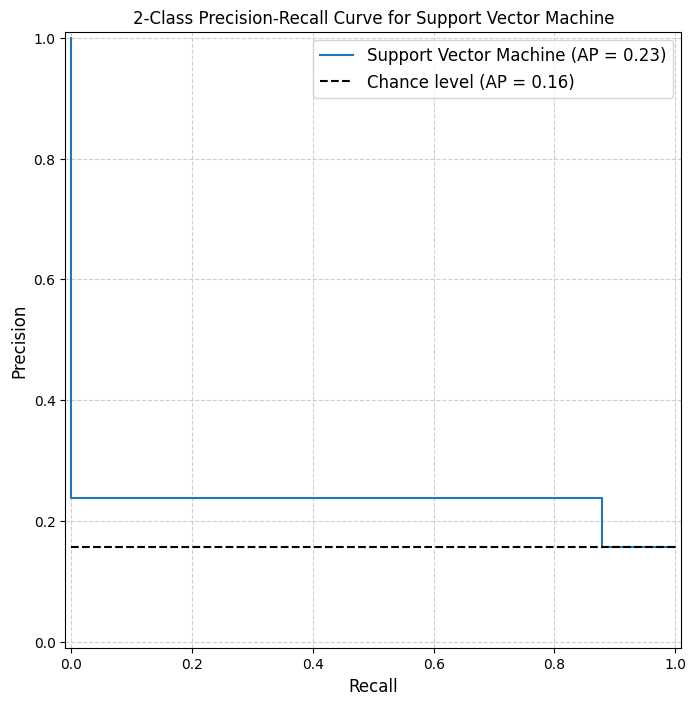

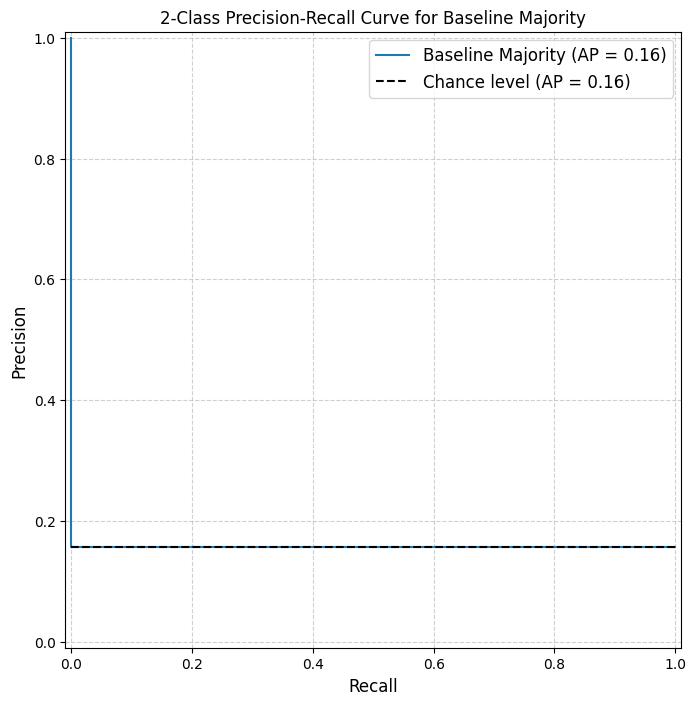

In [37]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    
    # Use PrecisionRecallDisplay for visualization
    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_test_pred,
        name=model_name,
        plot_chance_level=True  # Adds a baseline for random performance
    )

    # Customize the plot
    display.ax_.set_title(f"2-Class Precision-Recall Curve for {model_name}")
    display.ax_.grid(alpha=0.6, linestyle='--')  # Add grid
    display.ax_.set_xlabel('Recall', fontsize=12)
    display.ax_.set_ylabel('Precision', fontsize=12)
    display.figure_.set_size_inches(10, 8)  # Adjust figure size
    display.ax_.legend(fontsize=12)

    # Display the plot
    plt.show()

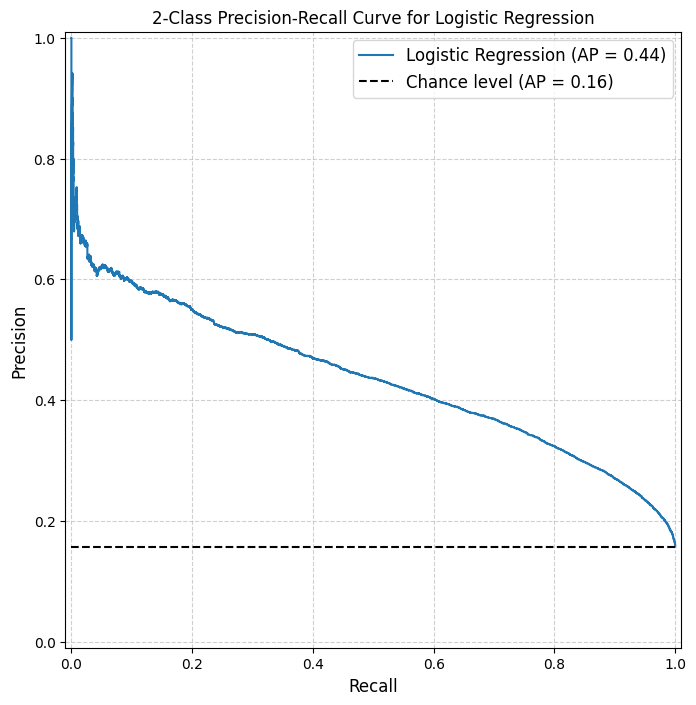

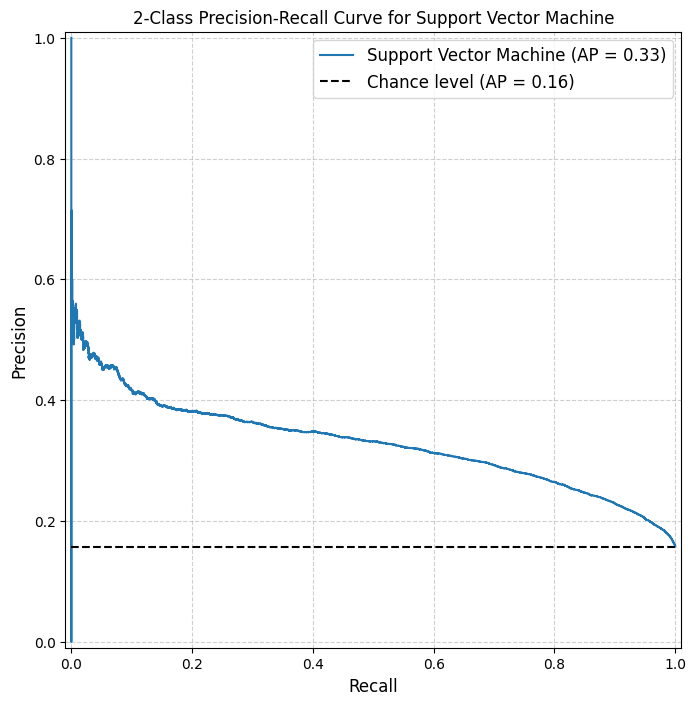

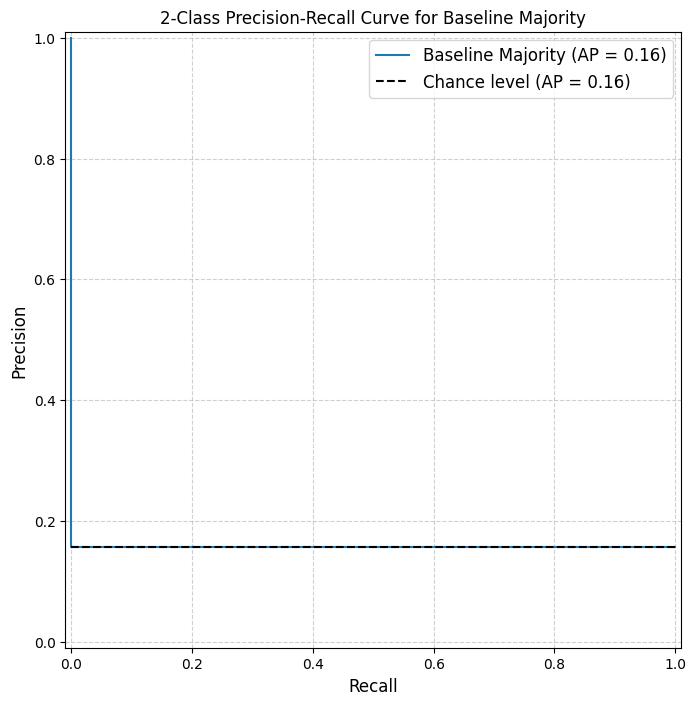

In [41]:
for model_name, model in model_dict.items():
    # Use predict_proba to get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        y_test_proba = model.decision_function(X_test)
    
    # Use PrecisionRecallDisplay for visualization
    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_test_proba,  # Use probabilities instead of binary predictions
        name=model_name,
        plot_chance_level=True  # Adds a baseline for random performance
    )

    # Customize the plot
    display.ax_.set_title(f"2-Class Precision-Recall Curve for {model_name}")
    display.ax_.grid(alpha=0.6, linestyle='--')  # Add grid
    display.ax_.set_xlabel('Recall', fontsize=12)
    display.ax_.set_ylabel('Precision', fontsize=12)
    display.figure_.set_size_inches(10, 8)  # Adjust figure size
    display.ax_.legend(fontsize=12)

    # Display the plot
    plt.show()
